# Part 1 EDA

Part One: EDA

You should gain an understanding of the attacks (focus on attacktype1), their distribution across the world, and their frequency.

You must produce at least one visualization that is indexed by time. For example, the number of bombings that occurred by year over time.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import plotly.plotly as py
import plotly.graph_objs as go
from plotly import tools
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode()

In [3]:
np.set_printoptions(threshold =  np.nan)
pd.set_option('display.max_columns', 999)

In [54]:
data = pd.read_csv('globalterrorismdb_0617dist.csv', encoding = 'latin-1')

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.



In [5]:
data.shape

(170350, 135)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170350 entries, 0 to 170349
Columns: 135 entries, eventid to related
dtypes: float64(53), int64(24), object(58)
memory usage: 175.5+ MB


In [7]:
data.isnull().any()

eventid               False
iyear                 False
imonth                False
iday                  False
approxdate             True
extended              False
resolution             True
country               False
country_txt           False
region                False
region_txt            False
provstate              True
city                   True
latitude               True
longitude              True
specificity            True
vicinity              False
location               True
summary                True
crit1                 False
crit2                 False
crit3                 False
doubtterr             False
alternative            True
alternative_txt        True
multiple              False
success               False
suicide               False
attacktype1           False
attacktype1_txt       False
                      ...  
propextent             True
propextent_txt         True
propvalue              True
propcomment            True
ishostkid           

### Creating new columns that I wanted to check out

In [8]:
#Wanted to see how 9/11 affected terrorism around the world particularly in the middle east
def post_911(x):
    if x > 2011:
        return 1
    else:
        return 0

#We are missing data from here so wanted to see how things are different
def post_1993(x):
    if x > 1993:
        return 1
    else:
        return 0

In [9]:
new_data = data.copy()
new_data['post_911'] = new_data.iyear.apply(post_911)
new_data['post_1993'] = new_data.iyear.apply(post_1993)

## Visualssssss

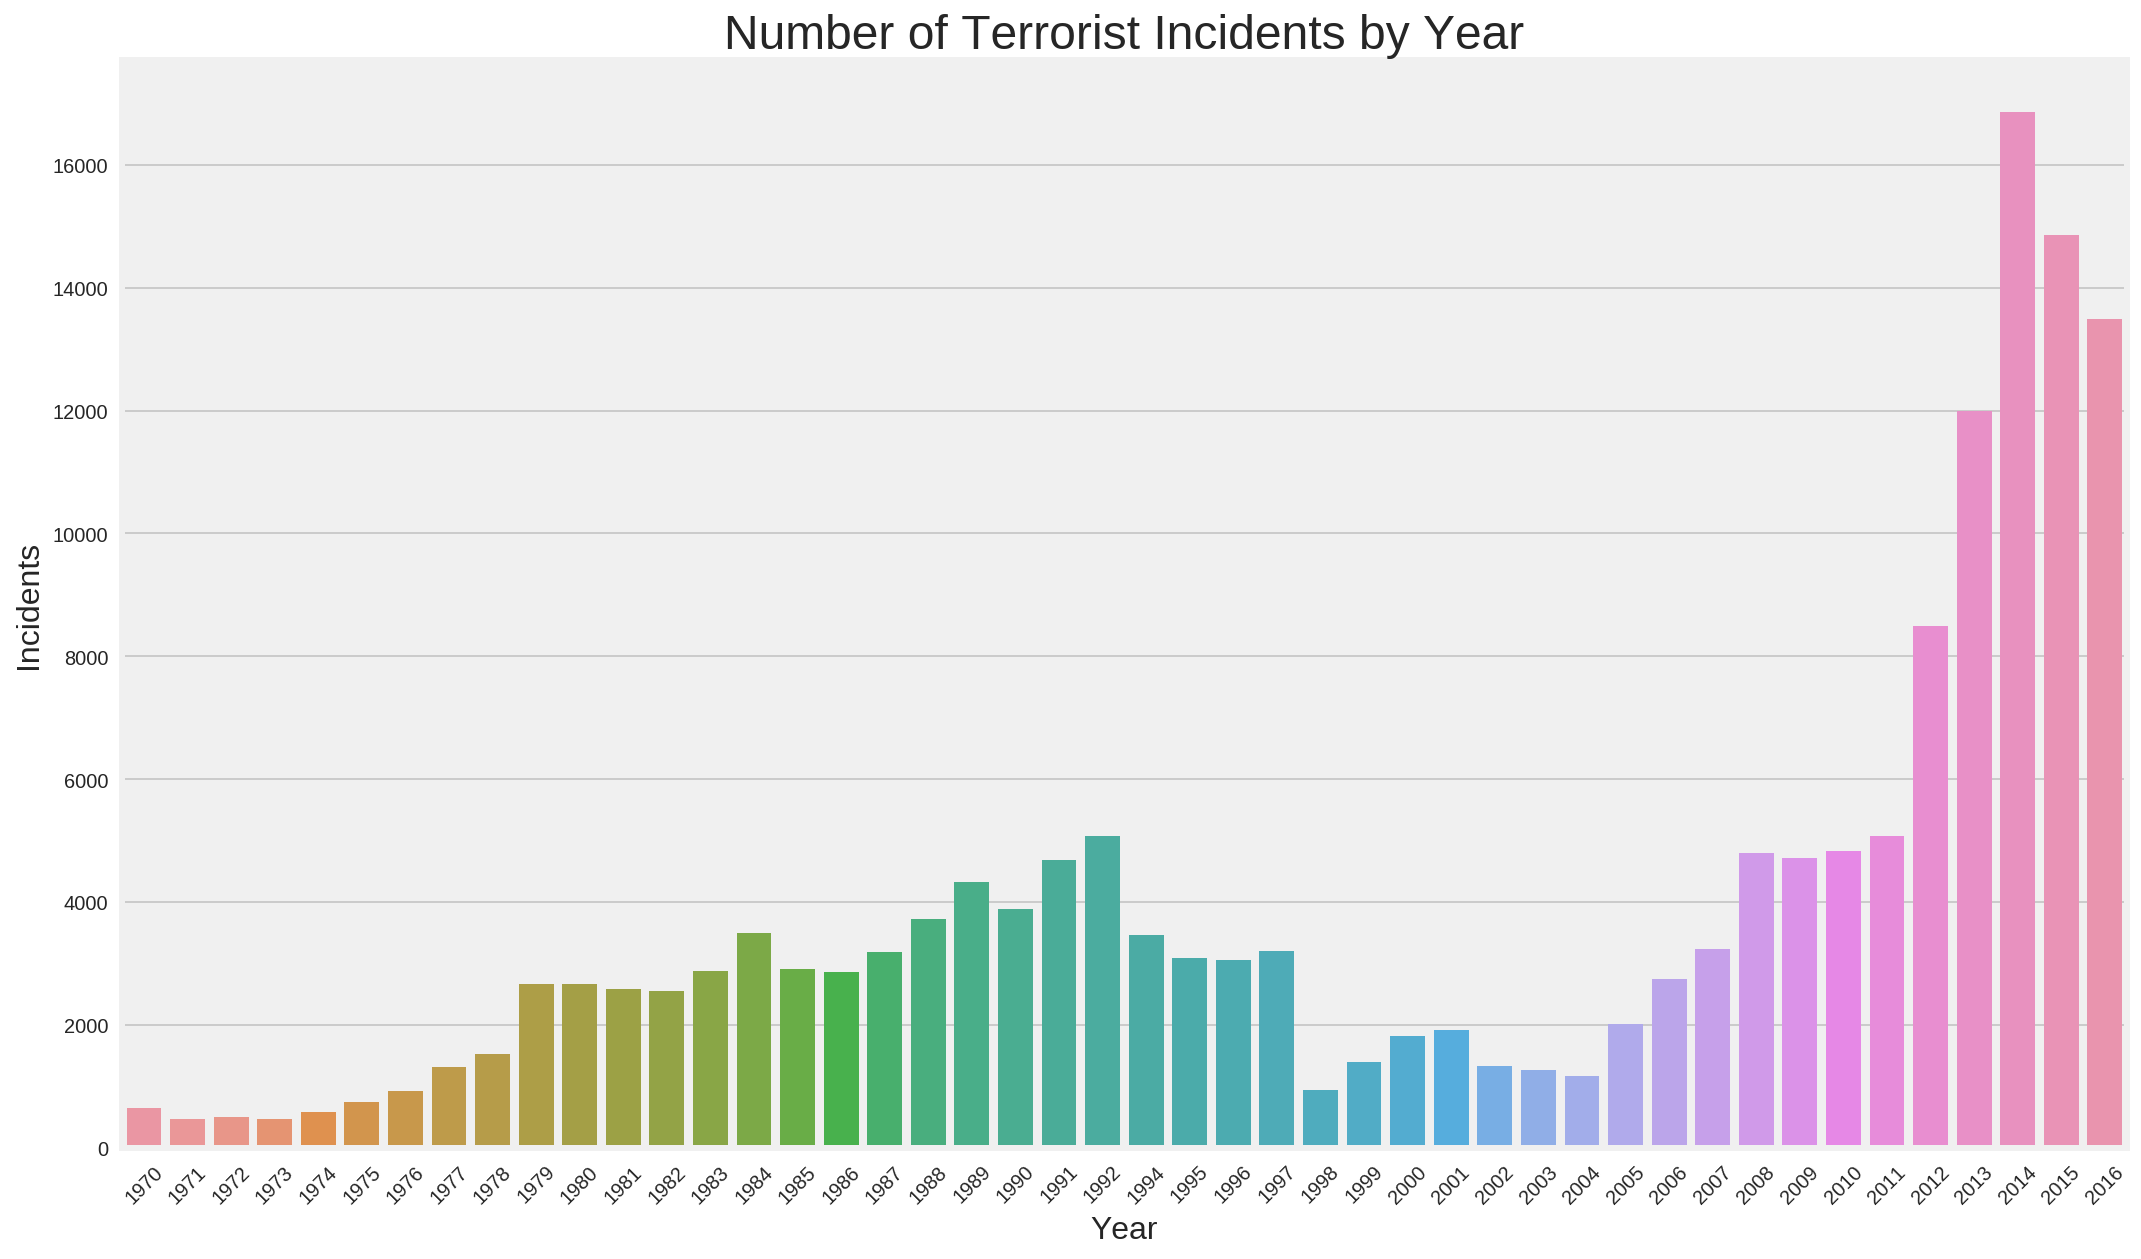

In [10]:
plt.figure(figsize = (16, 10))
sns.countplot(data = data, x = 'iyear')
plt.title('Number of Terrorist Incidents by Year', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Incidents', fontsize = 16)
plt.xticks(rotation = 45);

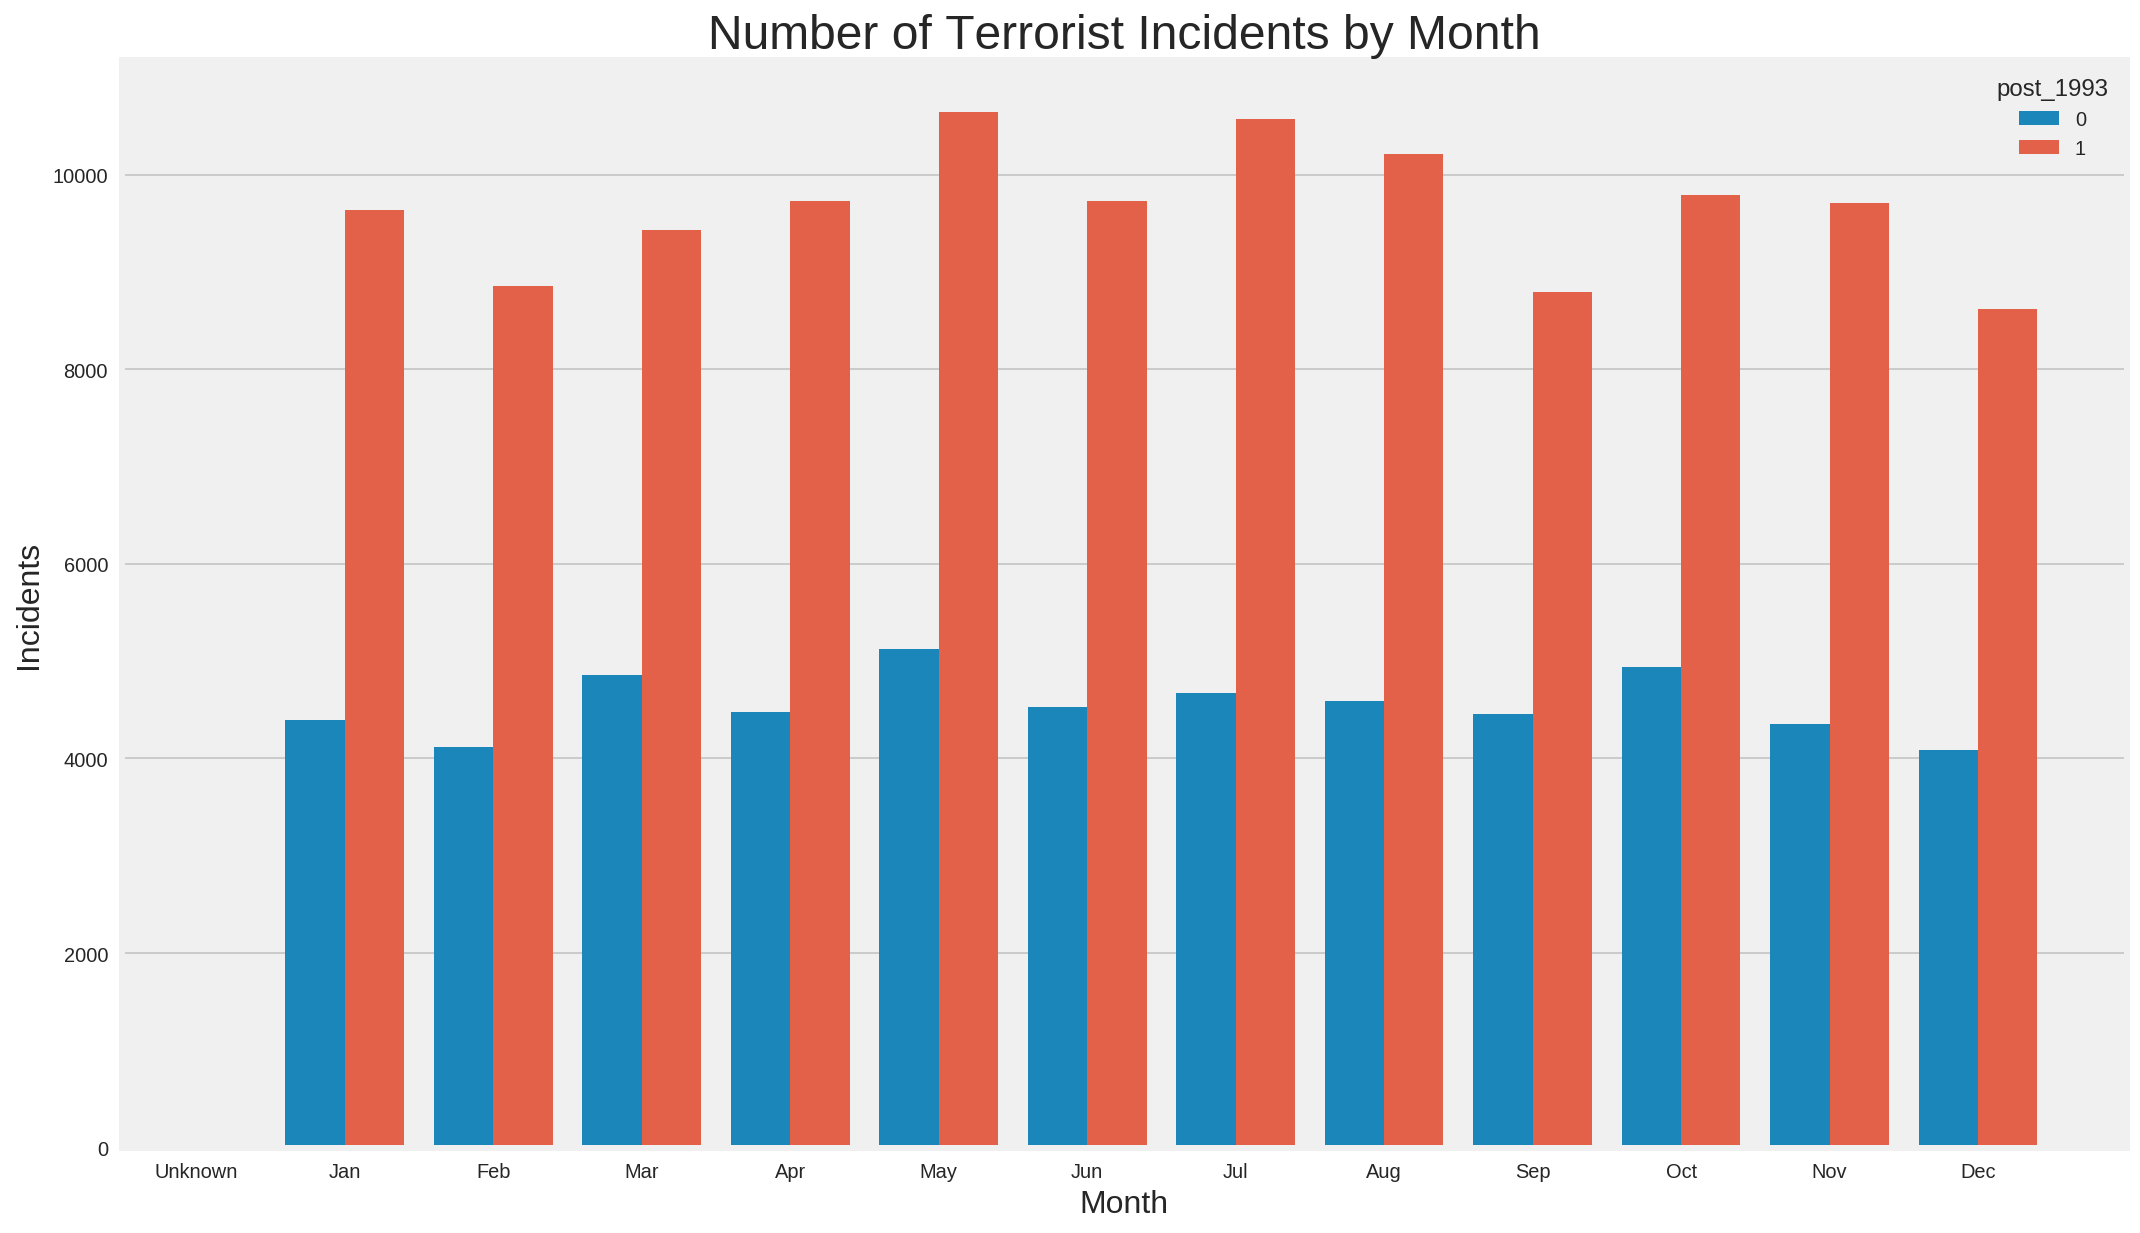

In [11]:
plt.figure(figsize = (16, 10))
sns.countplot(data = new_data, x = 'imonth', hue = 'post_1993')
plt.title('Number of Terrorist Incidents by Month', fontsize = 24)
plt.xlabel('Month', fontsize = 16)
plt.ylabel('Incidents', fontsize = 16)
plt.xticks(rotation = 0)
plt.xticks(np.arange(14), ['Unknown', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']);

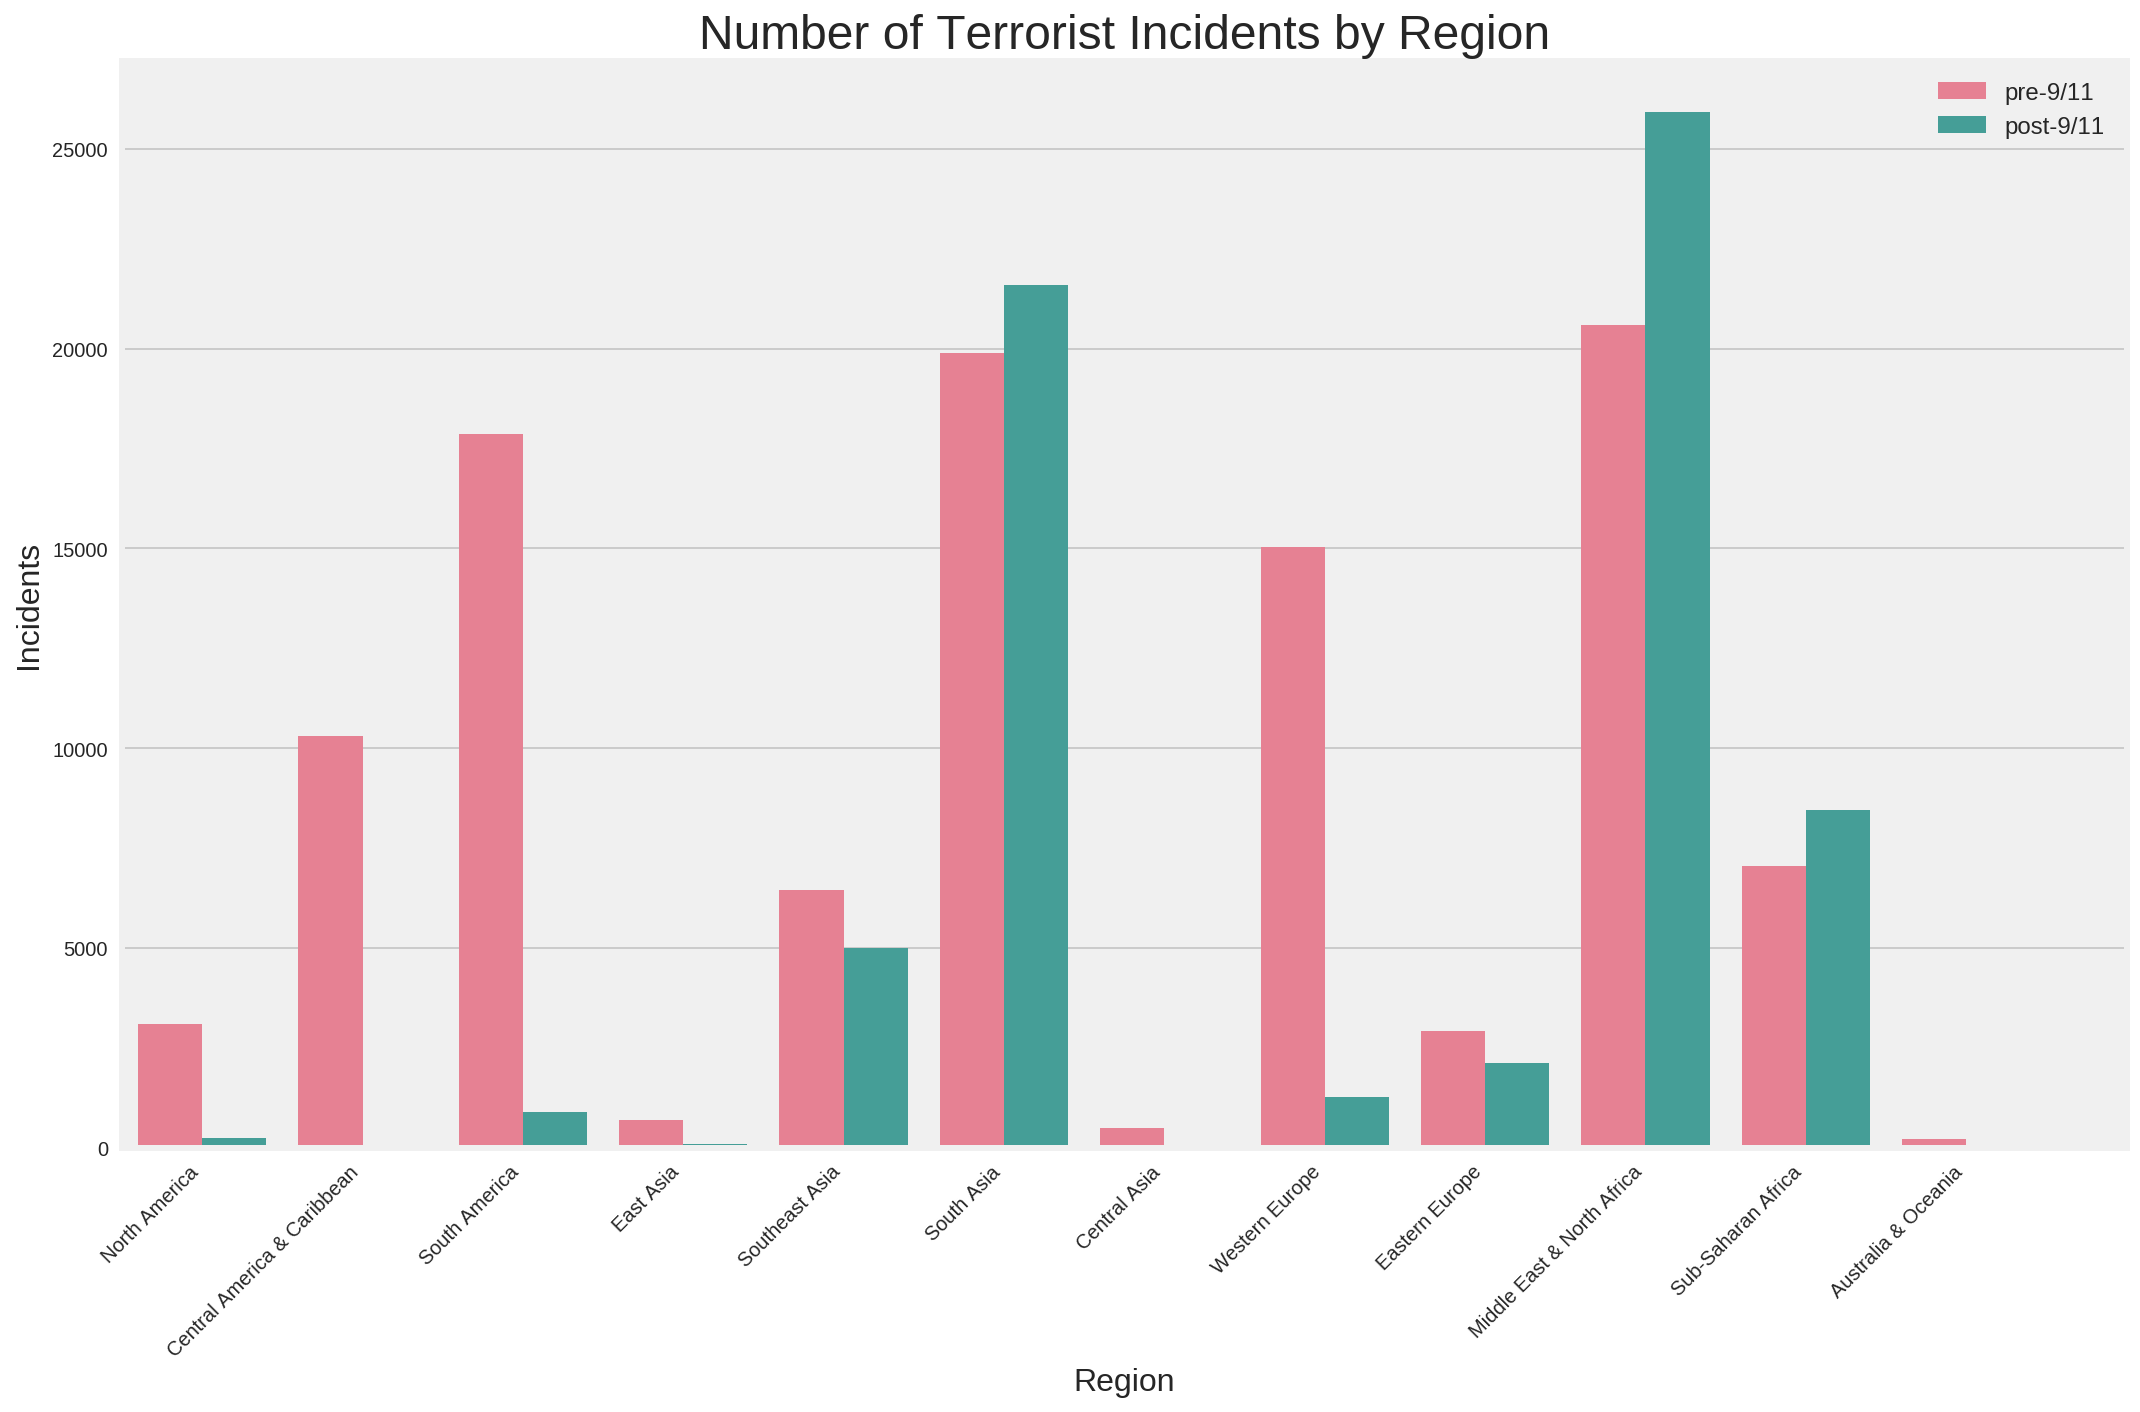

In [12]:
plt.figure(figsize = (16, 10))
ax = sns.countplot(data = new_data, x = 'region', hue = 'post_911', palette = 'husl')
plt.title('Number of Terrorist Incidents by Region', fontsize = 24)
plt.xlabel('Region', fontsize = 16)
plt.ylabel('Incidents', fontsize = 16)
plt.xticks(rotation = 45,)
plt.xticks(np.arange(13), ['North America', 'Central America & Caribbean', 'South America', 'East Asia', 'Southeast Asia', \
                          'South Asia', 'Central Asia', 'Western Europe', 'Eastern Europe', 'Middle East & North Africa', \
                          'Sub-Saharan Africa', 'Australia & Oceania'])
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.legend(['pre-9/11', 'post-9/11'], fontsize = 12);

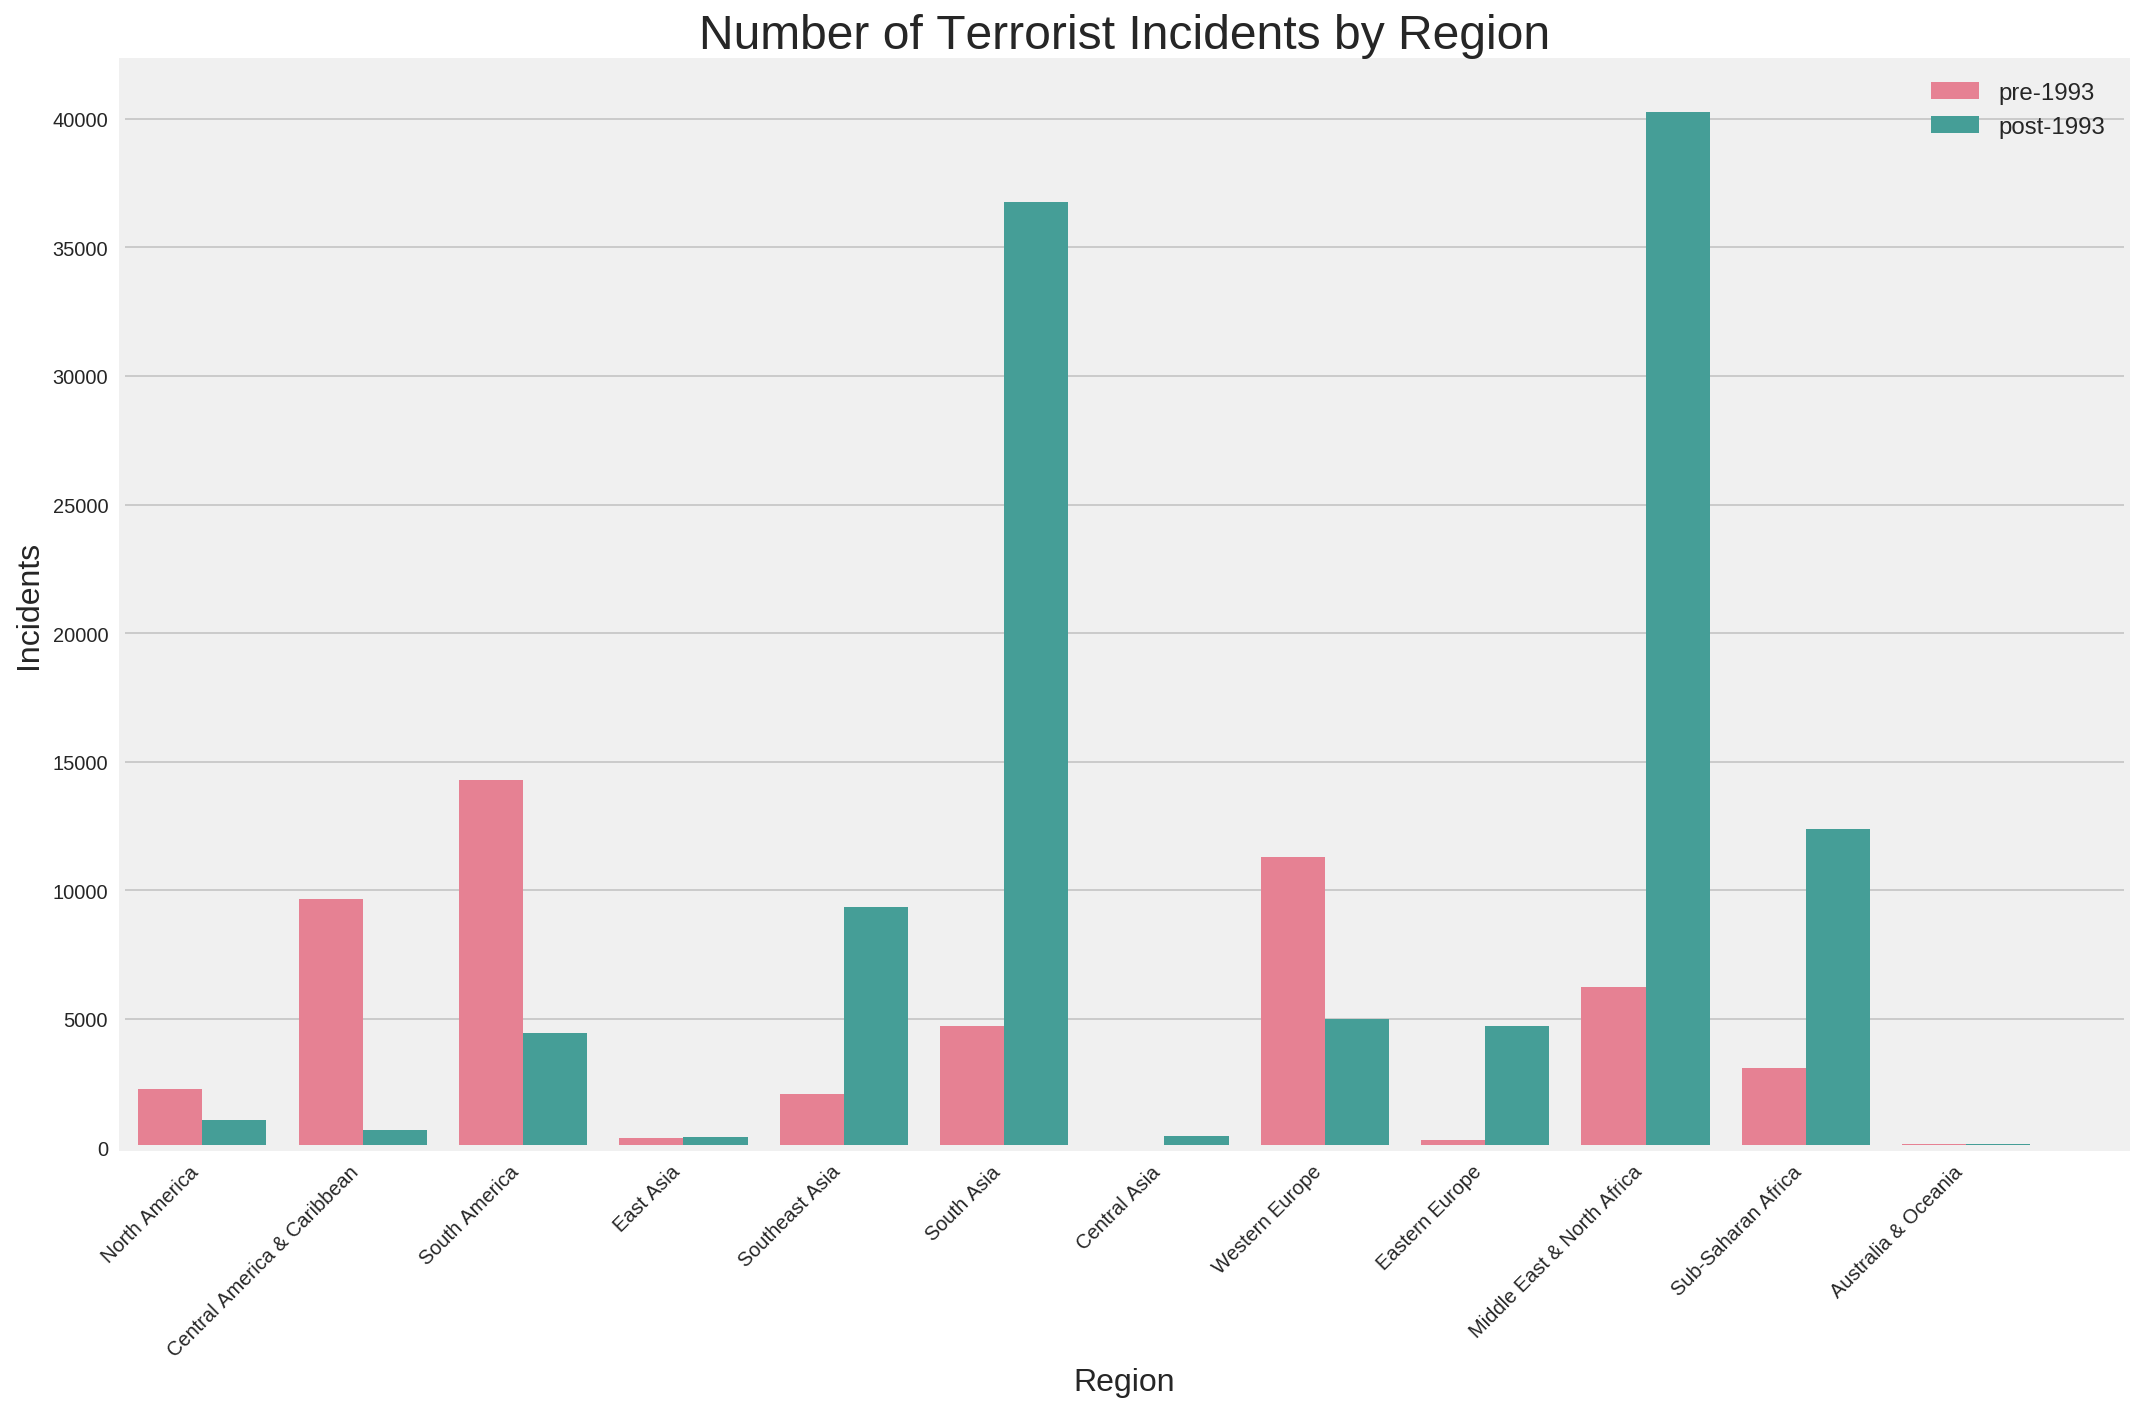

In [13]:
plt.figure(figsize = (16, 10))
ax = sns.countplot(data = new_data, x = 'region', hue = 'post_1993', palette = 'husl')
plt.title('Number of Terrorist Incidents by Region', fontsize = 24)
plt.xlabel('Region', fontsize = 16)
plt.ylabel('Incidents', fontsize = 16)
plt.xticks(rotation = 45,)
plt.xticks(np.arange(13), ['North America', 'Central America & Caribbean', 'South America', 'East Asia', 'Southeast Asia', \
                          'South Asia', 'Central Asia', 'Western Europe', 'Eastern Europe', 'Middle East & North Africa', \
                          'Sub-Saharan Africa', 'Australia & Oceania'])
plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
plt.legend(['pre-1993', 'post-1993'], fontsize = 12);

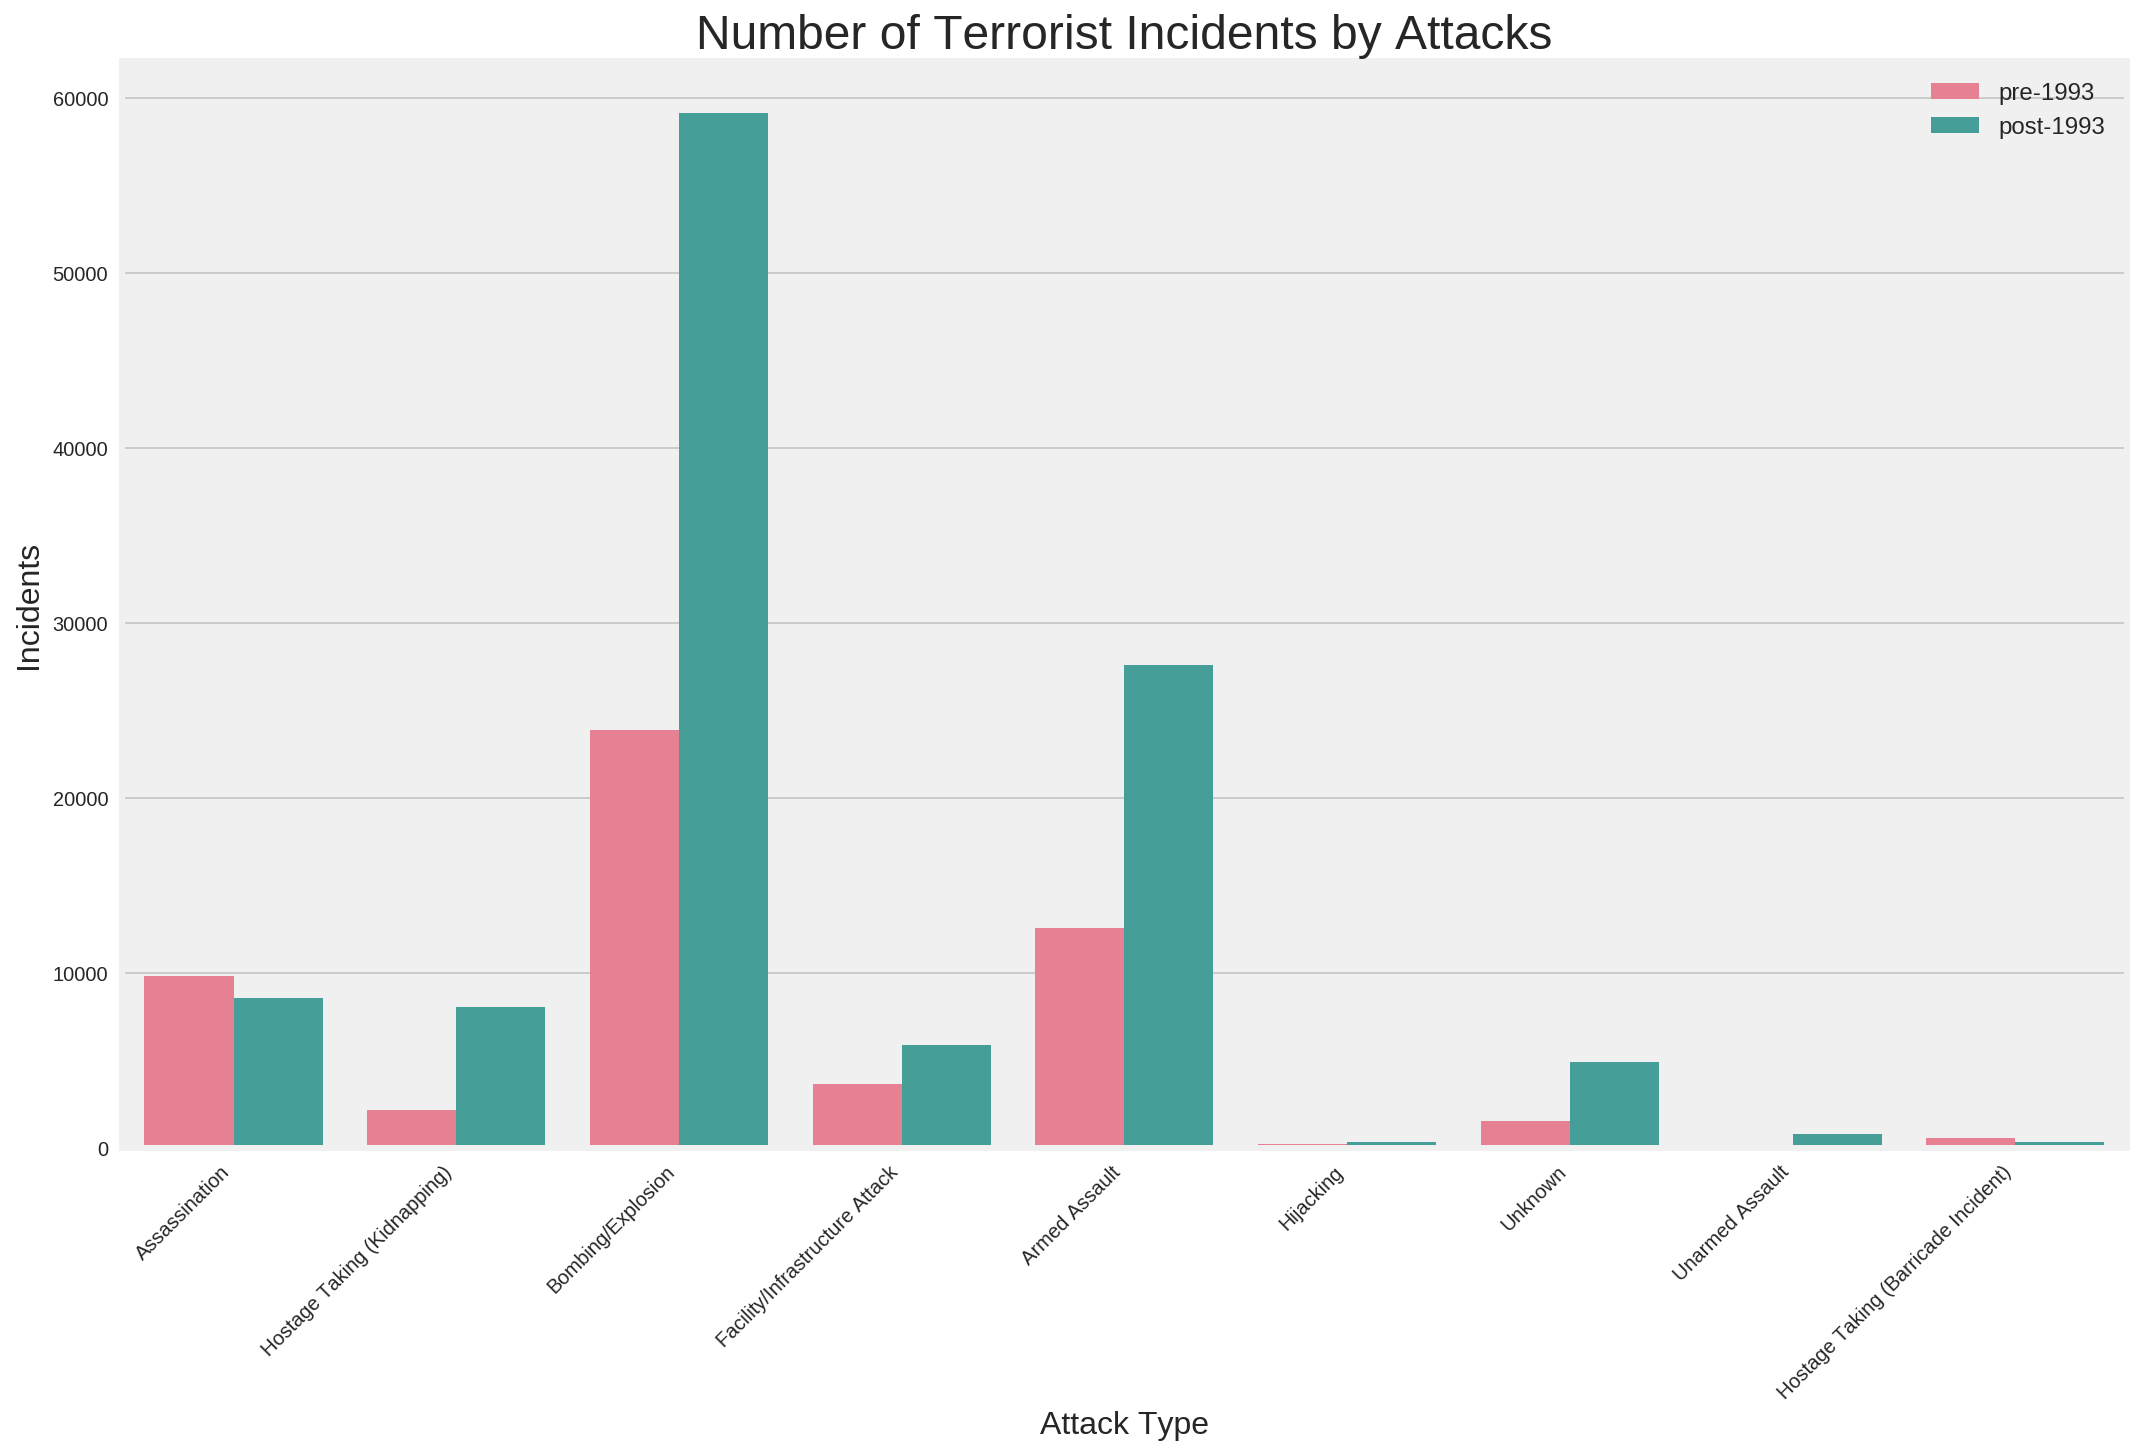

In [14]:
plt.figure(figsize = (16, 10))
ax = sns.countplot(data = new_data, x = 'attacktype1_txt', hue = 'post_1993', palette = 'husl')
plt.title('Number of Terrorist Incidents by Attacks', fontsize = 24)
plt.xlabel('Attack Type', fontsize = 16)
plt.ylabel('Incidents', fontsize = 16)
plt.xticks(rotation = 45)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right');
plt.legend(['pre-1993', 'post-1993'], fontsize = 12);

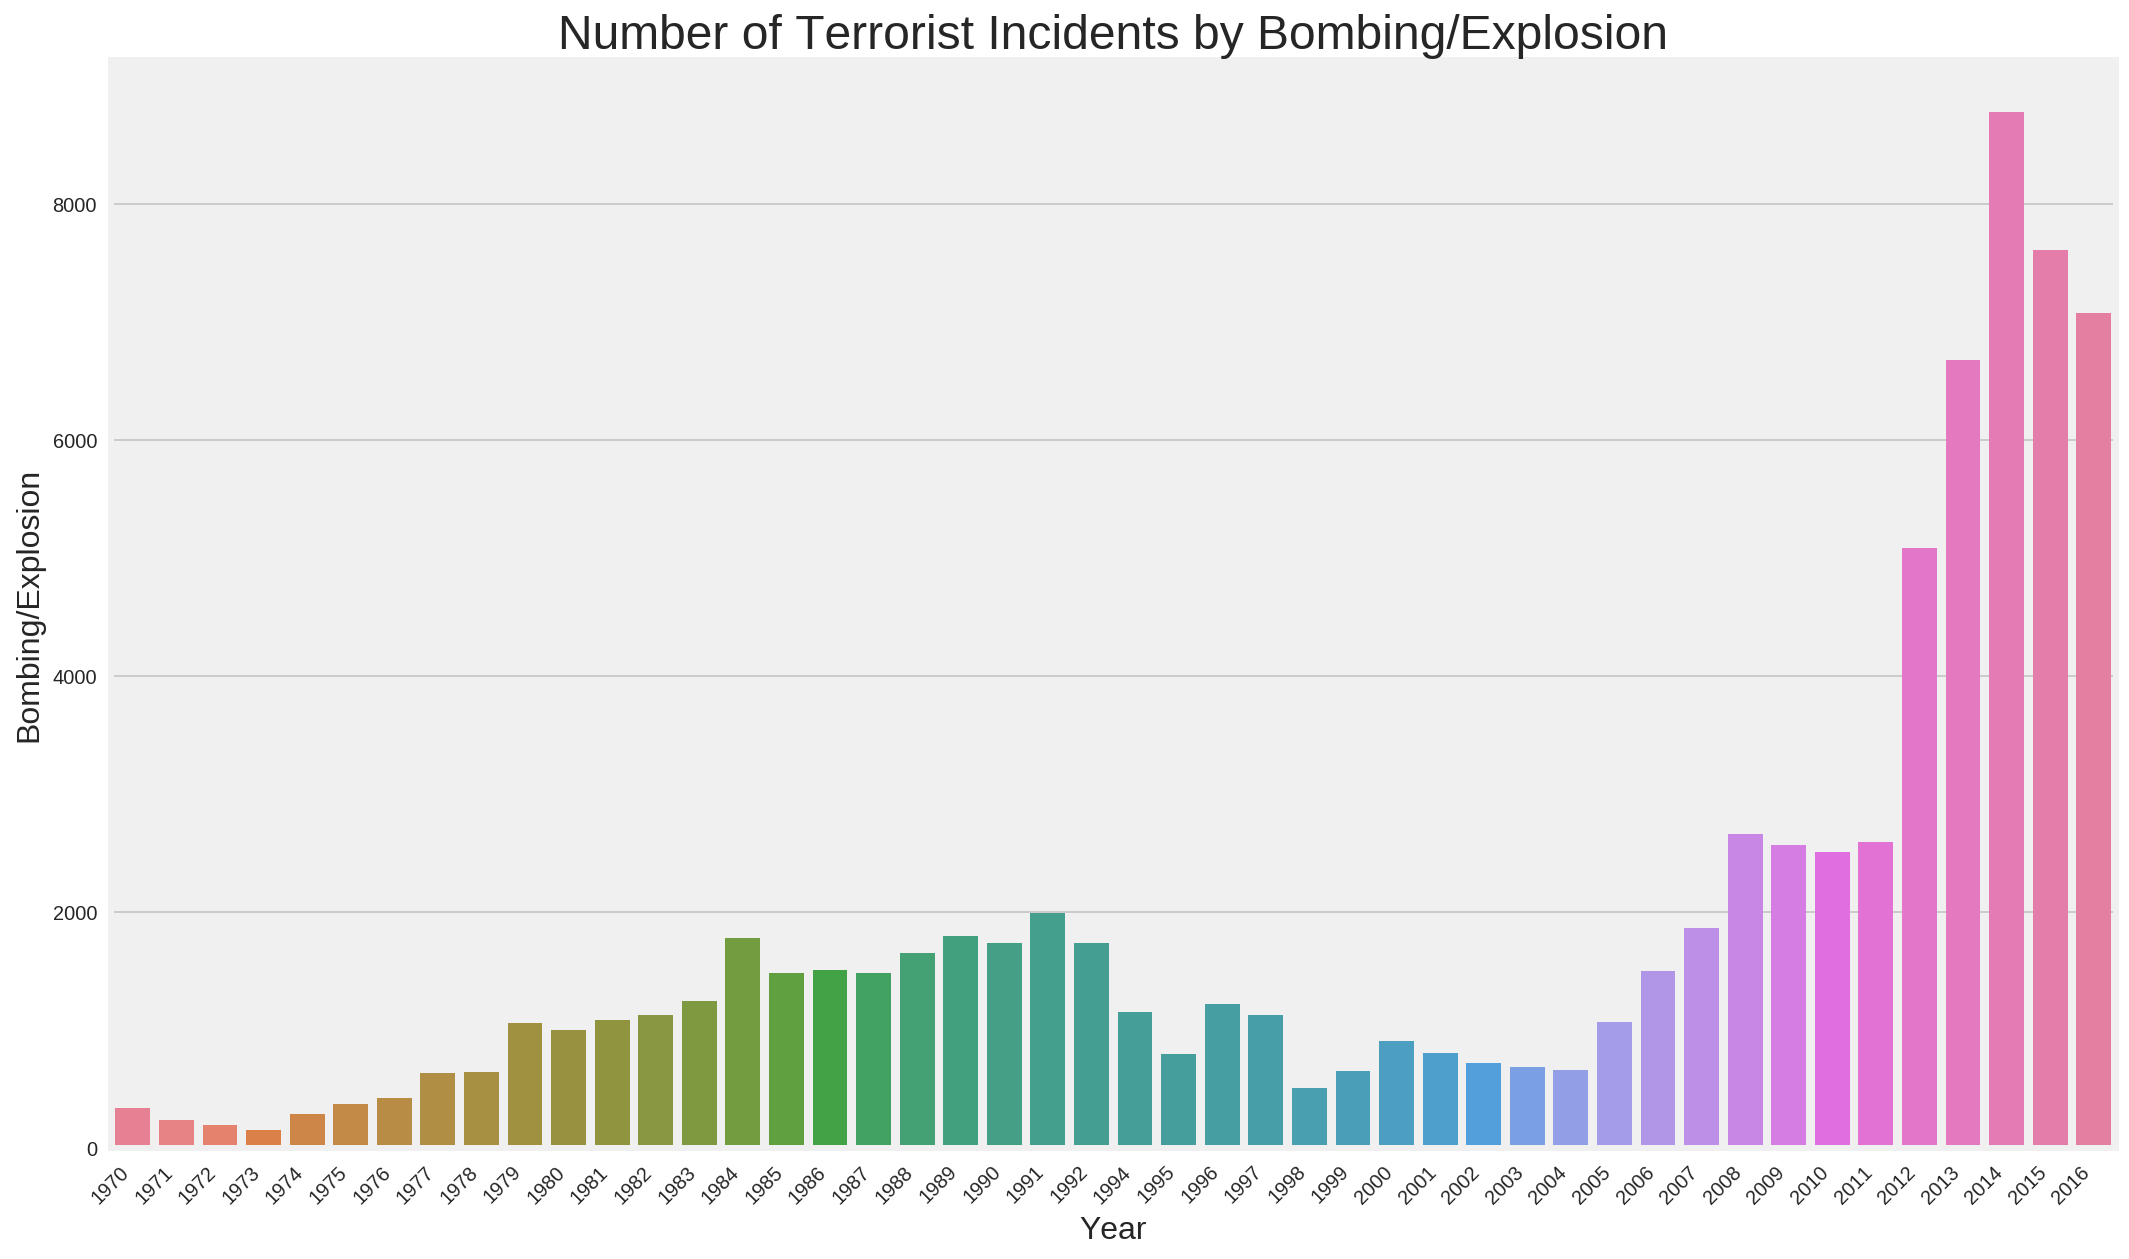

In [67]:
plt.figure(figsize = (16, 10))
ax = sns.countplot(data = new_data[new_data['attacktype1_txt'] == 'Bombing/Explosion'], x = 'iyear', palette = 'husl')
plt.title('Number of Terrorist Incidents by Bombing/Explosion', fontsize = 24)
plt.xlabel('Year', fontsize = 16)
plt.ylabel('Bombing/Explosion', fontsize = 16)
plt.xticks(rotation = 45)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right');

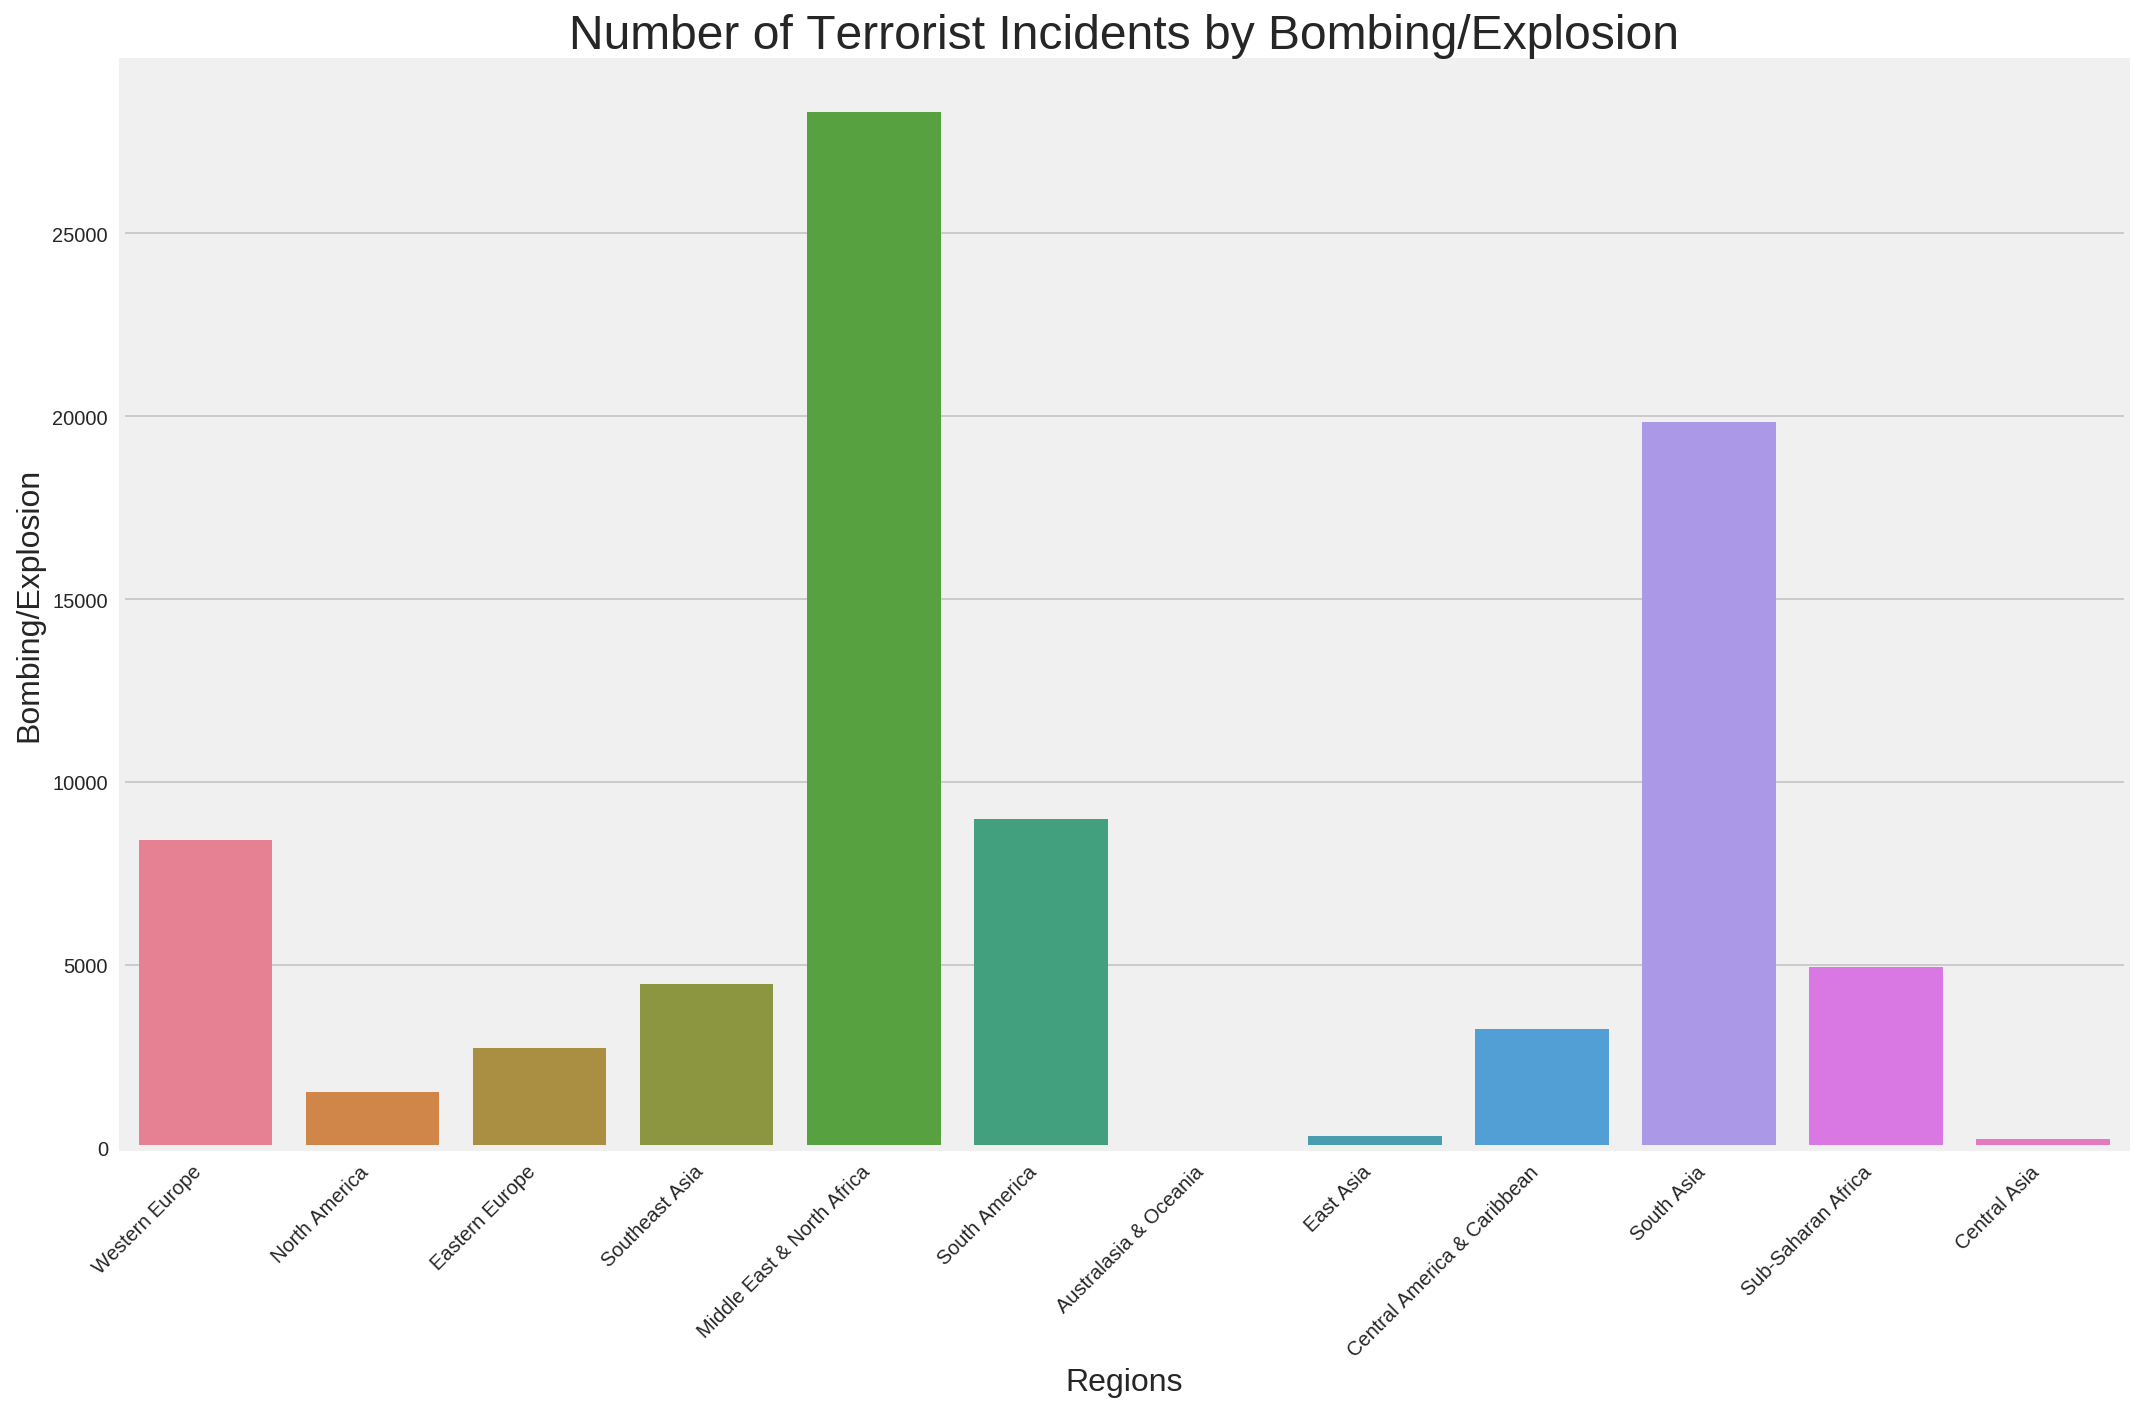

In [68]:
plt.figure(figsize = (16, 10))
ax = sns.countplot(data = new_data[new_data['attacktype1_txt'] == 'Bombing/Explosion'], x = 'region_txt', palette = 'husl')
plt.title('Number of Terrorist Incidents by Bombing/Explosion', fontsize = 24)
plt.xlabel('Regions', fontsize = 16)
plt.ylabel('Bombing/Explosion', fontsize = 16)
plt.xticks(rotation = 45)
plt.setp(ax.xaxis.get_majorticklabels(), ha='right');

### Let's try this plotly thing

#### Inspired by and learned a lot from this amazing visualist in the terrorism kaggle kernel https://www.kaggle.com/abigaillarion/terrorist-attacks-in-united-states

In [57]:
data.rename(columns={'iyear':'year', 'imonth':'month', 'iday':'day'}, inplace = True)
data['nkill'] = data['nkill'].fillna(0).astype(int)
data['nwound'] = data['nwound'].fillna(0).astype(int)

#Only looking at Africa and the most recent year 2016
terror_africa = data[(data['region'] == 11) & (data['year'] == 2016) ]
#making datetime
terror_africa['day'][terror_africa.day == 0] = 1
terror_africa['month'][terror_africa.month == 0] = 1
terror_africa['date'] = pd.to_datetime(terror_africa[['day', 'month', 'year']])
terror_africa = terror_africa[['eventid', 'date', 'year', 'country_txt', 'latitude', 'longitude',
                         'targtype1_txt', 'weaptype1_txt', 'nkill', 'nwound']]
terror_africa = terror_africa.sort_values(['nkill', 'nwound'])
terror_africa = terror_africa.drop_duplicates(['date', 'latitude', 'longitude', 'nkill'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:4702: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2910: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice fro

In [77]:
#what I want displayed
terror_africa['text'] = terror_africa['date'].dt.strftime('%B %-d, %Y') + '<br>' +\
                     terror_africa['nkill'].astype(str) + ' Killed, ' +\
                     terror_africa['nwound'].astype(str) + ' Injured'

kills = dict(
           type = 'scattergeo',
           locationmode = 'country names',
           lon = terror_africa[terror_africa.nkill > 0]['longitude'],
           lat = terror_africa[terror_africa.nkill > 0]['latitude'],
           text = terror_africa[terror_africa.nkill > 0]['text'],
           mode = 'markers',
           name = 'Kills',
           hoverinfo = 'text+name',
           marker = dict(
               size = terror_africa[terror_africa.nkill > 0]['nkill'] ** 0.255 * 8,
               opacity = 0.95,
               color = 'rgb(240, 140, 45)')
           )
        
wounds = dict(
         type = 'scattergeo',
         locationmode = 'country names',
         lon = terror_africa[terror_africa.nkill == 0]['longitude'],
         lat = terror_africa[terror_africa.nkill == 0]['latitude'],
         text = terror_africa[terror_africa.nkill == 0]['text'],
         mode = 'markers',
         name = 'Wounded',
         hoverinfo = 'text+name',
         marker = dict(
             size = (terror_africa[terror_africa.nkill == 0]['nwound'] + 1) ** 0.245 * 8,
             opacity = 0.85,
             color = 'rgb(20, 150, 187)')
         )

layout = dict(
         title = 'Terrorist Attacks by Latitude/Longitude in Africa (2016)',
         showlegend = True,
         legend = dict(
             x = 0.85, y = 0.4
         ),
         geo = dict(
             scope = 'africa',
             projection = dict(type = 'mercator'),
             showland = True,
             landcolor = '#808080',
             subunitwidth = 1,
             subunitcolor = 'rgb(217, 217, 217)',
             countrywidth = 1,
             countrycolor = 'rgb(217, 217, 217)',
             showlakes = True,
             lakecolor = 'rgb(255, 255, 255)'),
    
         )

data_plot_africa = [kills, wounds]
figure = dict(data = data_plot_africa, layout = layout)
iplot(figure)

### I chose Southeast Asia because of reasons that is clear for Part 2 of Project 4

In [33]:
se_asia_data = data[data['region'] == 5].reset_index(drop = True)

In [34]:
philippines = se_asia_data[se_asia_data['country'] == 160]
thailand = se_asia_data[se_asia_data['country'] == 205]
indonesia = se_asia_data[se_asia_data['country'] == 93]
myanmar = se_asia_data[se_asia_data['country'] == 138]
cambodia = se_asia_data[se_asia_data['country'] == 36]

In [62]:
# terrorist attacks by year split up by countries in southeast asia
philippines_peryear = np.asarray(philippines.groupby('year').count().attacktype1)
thailand_peryear = np.asarray(thailand.groupby('year').count().attacktype1)
indonesia_peryear = np.asarray(indonesia.groupby('year').count().attacktype1)
myanmar_peryear = np.asarray(myanmar.groupby('year').count().attacktype1)
cambodia_peryear = np.asarray(cambodia.groupby('year').count().attacktype1)

terror_years = np.arange(1970, 2016)
# not 1993
terror_years = np.delete(terror_years, [23])

#make a trace for each country
trace_philippines = go.Scatter(
         x = terror_years,
         y = philippines_peryear,
         mode = 'lines',
         name = 'Philippines',
         line = dict(
             color = '#FFA500',
             width = 3)
         )

trace_thailand = go.Scatter(
         x = terror_years,
         y = thailand_peryear,
         mode = 'lines',
         name = 'Thailand',
         line = dict(
             color = '#0000FF',
             width = 3)
         )

trace_indonesia = go.Scatter(
         x = terror_years,
         y = indonesia_peryear,
         mode = 'lines',
         name = 'Indonesia',
         line = dict(
             color = '#008000',
             width = 3)
         )

trace_myanmar = go.Scatter(
         x = terror_years,
         y = myanmar_peryear,
         mode = 'lines',
         name = 'Myanmar',
         line = dict(
             color = '#4B0082',
             width = 3)
         )

trace_cambodia = go.Scatter(
         x = terror_years,
         y = cambodia_peryear,
         mode = 'lines',
         name = 'Cambodia',
         line = dict(
             color = '#800000',
             width = 3)
         )

#combine it all to put it in our data figure
trace = [trace_philippines, trace_thailand, trace_indonesia, trace_myanmar, trace_cambodia]

layout = go.Layout(
         title = 'Terrorist Attacks by Year in South East Asia (1970-2016)',
         xaxis = dict(
             rangeslider = dict(thickness = 0.05),
             showline = True,
             showgrid = False
         ),
         yaxis = dict(
             range = [0.1, 900],
             showline = True,
             showgrid = False)
         )

figure = dict(data = trace, layout = layout)
iplot(figure)

### Being specific about the type of attack, i.e. Bombings because that was the focus of our Part 3 for Project 4

In [37]:
se_asia_bombing = se_asia_data[se_asia_data['attacktype1_txt'] == 'Bombing/Explosion']

In [92]:
# terrorist attack targets grouped in categories
target_codes = []

#grouping different targets together
for attack in se_asia_bombing['targtype1_txt'].values:
    if attack in ['Business', 'NGO']:
        target_codes.append(1)
    elif attack in ['Government (General)', 'Government (Diplomatic)']:
        target_codes.append(2)
    elif attack == 'Journalists & Media':
        target_codes.append(4)
    elif attack == 'Educational Institution':
        target_codes.append(5)
    elif attack == 'Police':
        target_codes.append(6)
    elif attack == 'Military':
        target_codes.append(7)
    elif attack == 'Religious Figures/Institutions':
        target_codes.append(8)
    elif attack in ['Airports & Aircraft', 'Maritime', 'Transportation']:
        target_codes.append(9)
    elif attack in ['Food or Water Supply', 'Telecommunication', 'Utilities']:
        target_codes.append(10)
    else:
        target_codes.append(3)

se_asia_bombing['target_code'] = target_codes
target_categories = ['Business', 'Government', 'Individuals', 'Media', 'Education',
                     'Police', 'Military', 'Religion', 'Transportation', 'Infrastructure']

# terrorist attacks by target
target_count = np.asarray(se_asia_bombing.groupby('target_code').target_code.count())
target_percent = np.round(target_count / sum(target_count) * 100, 2)

# terrorist attack fatalities by target
target_fatality = np.asarray(se_asia_bombing.groupby('target_code')['nkill'].sum())
target_yaxis = np.log10(target_fatality) -0.4

# terrorist attack injuries by target
target_injury = np.asarray(se_asia_bombing.groupby('target_code')['nwound'].sum())
target_xaxis = np.log10(target_injury)

target_text = []
for i in range(0, 10):
    target_text.append(target_categories[i] + ' (' + target_percent[i].astype(str) 
                       + '%)<br>' + target_fatality[i].astype(str) + ' Killed, '
                       + target_injury[i].astype(str) + ' Injured')

data_circle = [go.Scatter(
        x = target_injury,
        y = target_fatality,
        text = target_text,
        mode = 'markers',
        hoverinfo = 'text',
        marker = dict(
            size = target_count / 6,
            opacity = 0.7,
            color = '#FFE4E1')
        )]

layout = go.Layout(
         title = 'Terrorist Bomb Attacks by Target in South East Asia (1970-2016)',
         xaxis = dict(
             title = 'Wounded',
             type = 'log',
             range = [1.36, 4],
             tickmode = 'auto',
             nticks = 2,
             showline = True,
             showgrid = False
         ),
         yaxis = dict(
             title = 'Kills',
             type = 'log',
             range = [0.59, 4],
             tickmode = 'auto',
             nticks = 4,
             showline = True,
             showgrid = False)
         )

annotations = []
for i in range(0, 10):
    annotations.append(dict(x=target_xaxis[i], y=target_yaxis[i],
                            xanchor='middle', yanchor='top',
                            text=target_categories[i], showarrow=False))
layout['annotations'] = annotations

figure = dict(data = data_circle, layout = layout)
iplot(figure)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

